# <center>***数据预处理***</center>

数据预处理是机器学习和数据分析中至关重要的一步，旨在清洁、转换和准备原始数据，以便将其应用于后续的建模和分析过程。
<br><br><br>

In [1]:
!pip install pandas 
!pip install scikit-learn


## **数据收集与获取：**
   这一步涉及收集与获取原始数据，可以从数据库、文件、API、传感器等各种来源获取数据。


### *读取CSV文件*

In [1]:
import pandas as pd

df1 = pd.read_csv("data\\boston_house_prices.csv", header=1, sep=",")
df1.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


### *读取Excel文件*

In [3]:
import pandas as pd

df2 = pd.read_excel("data\\Evaluation.xlsx")
df2.head(2)

,序号,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10
0,1,1.5,7.1,280,424,4,430,90,112,459,453
1,2,1.5,7.1,280,424,4,431,92,112,459,453



## **数据清洗：**
   数据可能包含缺失值、异常值、错误值等问题。在数据清洗阶段，你需要处理这些问题，以确保数据质量。常见的操作包括填充缺失值、删除异常值或错误值、纠正数据格式等。


### *缺失值的检测与处理*

In [4]:
# 缺失值分布情况统计
nan_ = df1.isnull().sum()
# print(df1.isnull().sum())

In [5]:
# 使用指定数值填补缺失值（比如3，也可以是字符串）
# df1['Gender'].fillna(3, inplace=True)

# 分类、序数特征用的是众数填补缺失值，mode()后面的[0]是为了避免数据中不止一个众数
# df1['Gender'].fillna(df1['Gender'].mode()[0], inplace=True)

# 数值特征用中位数填补缺失值
# df1['LoanAmount'].fillna(df1['LoanAmount'].median(), inplace=True)

# 数值特征用均值填补缺失值
# df1['LoanAmount'].fillna(df1['LoanAmount'].mean(), inplace=True)

# 用插值方法填补缺失值，注意如果数据开头就是缺失值，那么那个缺失值不会被插补
# df1['LoanAmount'] = df1['LoanAmount'].interpolate(method="linear", axis=0)

# 直接删掉含有缺失值的行
df1 = df1.dropna()

# 删除数据集df1中ApplicantIncome的值为'value'的样本
# df1 = df1[df1['ApplicantIncome'] != 'value']

### *离群值的检测与处理*

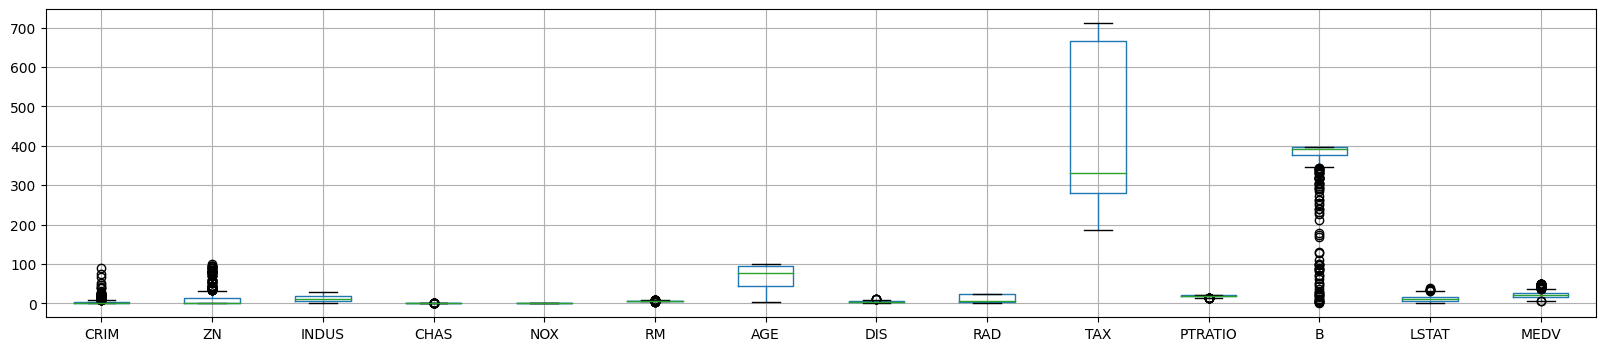

In [6]:
import matplotlib.pyplot as plt

df1.boxplot(figsize=(20, 4))
plt.show()

In [7]:
from sklearn.ensemble import IsolationForest

# 创建孤立森林作为异常检测模型，contamination值要酌情根据箱线图给出
model = IsolationForest(contamination=0.05)
df1['is_outlier'] = model.fit_predict(df1[['INDUS']])
df_cleaned = df1[df1['is_outlier'] != -1]


## **数据转换：**
   在这一步，数据可能需要进行转换以适应后续的分析或建模。这可能包括将数据编码为适当的格式（例如数值编码或独热编码）、进行特征缩放（例如归一化或标准化）等。


### *数据编码*

In [8]:
# 日期编码
# df1["date"] = pd.to_datetime(df1["date"])

In [9]:
# 独热编码（函数会自动识别分类特征，将字符串全部独热编码）
df1 = pd.get_dummies(df1)

In [10]:
# 数值特征离散化
bins = [0, 10, 20, 30, 40, 50]
labels = ['1', '2', '3', '4', '5']
df1['binned_column'] = pd.cut(df1['MEDV'], bins=bins, labels=labels)

### *特征缩放*

In [11]:
# 假设你的数据集为df，包含特征和目标变量
X = df1.drop(columns=['MEDV']) 
y = df1['MEDV']  

In [12]:
from sklearn.preprocessing import StandardScaler

# 标准化 (Z-Score 归一化)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
from sklearn.preprocessing import MinMaxScaler

# MinMax 缩放
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


## **数据集划分：**
   将数据集划分为训练集、验证集和测试集是为了评估模型性能的步骤。通常，训练集用于训练模型，验证集用于调整模型参数，测试集用于评估模型的泛化性能。


In [14]:
from sklearn.model_selection import train_test_split

# 划分数据集为训练集、验证集和测试集
# test_size表示测试集的比例，random_state用于确保可复现的随机划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **特征选择与降维：**
   如果数据集包含大量特征，你可能需要进行特征选择或降维，以减少计算成本并降低过拟合风险。常见的降维方法包括主成分分析（PCA）等。


### *特征选择*

In [15]:
# VarianceThreshold: 根据特征的方差进行选择。可以用于删除方差较低的特征，因为这些特征可能包含的信息较少。
from sklearn.feature_selection import VarianceThreshold

# 创建VarianceThreshold实例
selector = VarianceThreshold(threshold=0.5)

# 对数据进行特征选择
X_selected = selector.fit_transform(df1)

print("原始特征数量:", X.shape[1])
print("选择后的特征数量:", X_selected.shape[1])

原始特征数量: 15
选择后的特征数量: 12
选择后的特征矩阵:
 [[0.00632 18.0 2.31 ... 4.98 24.0 '3']
 [0.02731 0.0 7.07 ... 9.14 21.6 '3']
 [0.02729 0.0 7.07 ... 4.03 34.7 '4']
 ...
 [0.06076 0.0 11.93 ... 5.64 23.9 '3']
 [0.10959 0.0 11.93 ... 6.48 22.0 '3']
 [0.04741 0.0 11.93 ... 7.88 11.9 '2']]


In [16]:
# SelectKBest和SelectPercentile: 基于统计测试的方法，选择与目标变量最相关的前K个特征，或者选择在指定百分比范围内与目标变量最相关的特征。
from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2

# 创建SelectKBest实例
# k_best_selector = SelectKBest(score_func=chi2, k=2)  # 这个k就是你要保留的特征
# X_k_best = k_best_selector.fit_transform(X, y)

# 创建SelectPercentile实例
# percentile_selector = SelectPercentile(score_func=chi2, percentile=50)  # percentile=50 表示你要选择与目标变量最相关的 50% 的特征。
# X_percentile = percentile_selector.fit_transform(X, y)

# print("SelectKBest选中的特征:\n", X_k_best)
# print("SelectPercentile选中的特征:\n", X_percentile)

### *基于主成分分析法的数据降维*

In [17]:
from sklearn.decomposition import PCA
import numpy as np

# 创建PCA实例：n_components表示降维后的特征数量
# pca = PCA(n_components=3)

# 拟合PCA模型并进行降维
# X = pca.fit_transform(X)

In [18]:
# 绘制主成分方差解释比例图
"""
在主成分方差解释比例图中，x轴表示主成分的个数，y轴表示累积主成分方差解释比例。
通过观察图表，你可以找到一个“肘部”点，这个点通常是一个拐点，之后的主成分所解释的方差比例增长会减缓。
这个肘部点所对应的主成分数量可以作为一个合理的n_components选择。

plt.figure(figsize=(20, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('降维所得个数')
plt.ylabel('主成分的方差解释比例')
plt.title('主成分的方差解释比例图')
plt.show()
"""

"\n在主成分方差解释比例图中，x轴表示主成分的个数，y轴表示累积主成分方差解释比例。\n通过观察图表，你可以找到一个“肘部”点，这个点通常是一个拐点，之后的主成分所解释的方差比例增长会减缓。\n这个肘部点所对应的主成分数量可以作为一个合理的n_components选择。\n\nplt.figure(figsize=(20, 5))\nplt.plot(np.cumsum(pca.explained_variance_ratio_))\nplt.xlabel('降维所得个数')\nplt.ylabel('主成分的方差解释比例')\nplt.title('主成分的方差解释比例图')\nplt.show()\n"


## **标签平衡：**
   在某些情况下，数据集可能存在类别不平衡的问题，即某些类别的样本数量远远少于其他类别。在这种情况下，你可能需要采取措施来平衡样本，以避免模型偏向数量较多的类别。


In [19]:
from imblearn.over_sampling import RandomOverSampler

# 创建RandomOverSampler对象
# ros = RandomOverSampler(random_state=0)

# 对数据进行上采样
# X_upsampled, y_upsampled = ros.fit_resample(X, y)


## **数据验证与验证：**

在预处理完成后，应该对处理过的数据进行验证，确保数据没有被损坏或错误处理。这有助于确保模型的训练和评估过程是可靠的。



In [20]:
# 查看数据情况，这里默认输出变量的前5行
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,is_outlier,binned_column
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1,3
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1,3
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,4
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,4


In [21]:
# 输出数据的特征名称
df1.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'is_outlier', 'binned_column'],
      dtype='object')

In [22]:
# 数据的特征名称及其类型
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   CRIM           506 non-null    float64 
 1   ZN             506 non-null    float64 
 2   INDUS          506 non-null    float64 
 3   CHAS           506 non-null    int64   
 4   NOX            506 non-null    float64 
 5   RM             506 non-null    float64 
 6   AGE            506 non-null    float64 
 7   DIS            506 non-null    float64 
 8   RAD            506 non-null    int64   
 9   TAX            506 non-null    int64   
 10  PTRATIO        506 non-null    float64 
 11  B              506 non-null    float64 
 12  LSTAT          506 non-null    float64 
 13  MEDV           506 non-null    float64 
 14  is_outlier     506 non-null    int32   
 15  binned_column  506 non-null    category
dtypes: category(1), float64(11), int32(1), int64(3)
memory usage: 58.1 KB


In [23]:
# 描述性统计分析，一般专门用于数值特征
df1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,is_outlier
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,0.924901
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.380584
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,-1.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,1.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,1.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,1.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000


In [24]:
# 针对分类特征的类别简单统计
# df1['Loan_Status'].value_counts()